In [2]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.projections import get_projection_class
from matplotlib.patches import Arc

In [3]:
def json_to_normalized_dataframe(path):
    rd = ""
    with open(path, 'r') as f:
        rd = f.read()
    obj = json.loads(rd)
    df = json_normalize(obj)
    return df

In [12]:
def players_with_coordinates(df, x_list = [0,44,32,32,44,56,66,66,87,87,100], y_list = [45,10,35,55,80,45,25,65,15,75,45], home_team = True):
    team_dict = {}
    if home_team == True:
        for i in df["tactics.lineup"][0]:
            team_dict[i['player']['name']] = []
    else:
        for i in df["tactics.lineup"][1]:
            team_dict[i['player']['name']] = []

    for x,y,z in zip(x_list, y_list, team_dict):
        entry = {z:[x,y]}
        team_dict.update(entry)

    return team_dict

In [15]:
def get_individual_sonar(player_name, df):
    local_df = df.copy(deep=True)
    local_df = local_df[local_df["type.name"]=="Pass"]
    local_df = local_df[local_df["player.name"]==player_name]
    local_df = local_df.dropna(axis=1, how="all")

    df1 = local_df[['pass.angle','pass.length']].copy()
    bins = np.linspace(-np.pi,np.pi,20)
    df1['binned'] = pd.cut(local_df['pass.angle'], bins, include_lowest=True, right = True)
    df1["Bin_Mids"] = df1["binned"].apply(lambda x: x.mid)
    df1 = df1[:-1]

    A= df1.groupby("Bin_Mids", as_index=False)["pass.length"].mean()
    A = A.dropna(0)
    
    ax = plt.subplot(111, projection='polar')

    ax.bar(A["Bin_Mids"], A["pass.length"])

    plt.title(player_name)

<ipython-input-3-22dd79457c5b>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


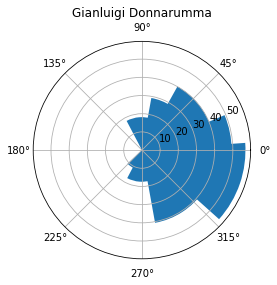

In [16]:
df = json_to_normalized_dataframe( "data/3795220_event.json")
team_dict = players_with_coordinates(df)
get_individual_sonar('Gianluigi Donnarumma', df)

In [17]:
def Passer(player):
    local_df = df.copy(deep=True)
    local_df = local_df[local_df["type.name"]=="Pass"]
    local_df = local_df[local_df["player.name"]==player]
    local_df = local_df.dropna(axis=1, how="all")

    df1 = local_df[['pass.angle','pass.length']].copy()
    bins = np.linspace(-np.pi,np.pi,20)
    df1['binned'] = pd.cut(local_df['pass.angle'], bins, include_lowest=True, right = True)
    df1["Bin_Mids"] = df1["binned"].apply(lambda x: x.mid)
    df1 = df1[:-1]

    A= df1.groupby("Bin_Mids", as_index=False)["pass.length"].mean()
    A = A.dropna(0)
    return A

In [22]:
def get_team_sonar(df, team_dict, x_list = [0,44,32,32,44,56,66,66,87,87,100], y_list = [45,10,35,55,80,45,25,65,15,75,45], width = 0.85):
    fig, ax = plt.subplots(figsize = (10.5, 6.8))
    
    for player_name, loc in team_dict.items():
        plot_inset(width ,ax, data = Passer(player_name), x = loc[0], y = loc[1])
        ax.text(loc[0]+10, loc[1] - 5, player_name, size = 5, rotation = -90)
    
    ax.plot([0,0],[0,90], color="black")
    ax.plot([0,130],[90,90], color="black")
    ax.plot([130,130],[90,0], color="black")
    ax.plot([130,0],[0,0], color="black")
    ax.plot([65,65],[0,90], color="black")


    #Left Penalty Area
    ax.plot([16.5,16.5],[65,25],color="black")
    ax.plot([0,16.5],[65,65],color="black")
    ax.plot([16.5,0],[25,25],color="black")


        #Right Penalty Area
    ax.plot([130,113.5],[65,65],color="black")
    ax.plot([113.5,113.5],[65,25],color="black")
    ax.plot([113.5,130],[25,25],color="black")

        #Left 6-yard Box
    ax.plot([0,5.5],[54,54],color="black")
    ax.plot([5.5,5.5],[54,36],color="black")
    ax.plot([5.5,0.5],[36,36],color="black")


        #Right 6-yard Box
    ax.plot([130,124.5],[54,54],color="black")
    ax.plot([124.5,124.5],[54,36],color="black")
    ax.plot([124.5,130],[36,36],color="black")


        #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")


        #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Goals
    ax.plot([-3,0],[41.35,41.35],color="black")
    ax.plot([-3,-3],[41.35,48.65],color="black")
    ax.plot([-3,0],[48.65,48.65],color="black")

    ax.plot([133,130],[41.35,41.35],color="black")
    ax.plot([133,133],[41.35,48.65],color="black")
    ax.plot([133,130],[48.65,48.65],color="black")

        #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

<ipython-input-3-22dd79457c5b>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


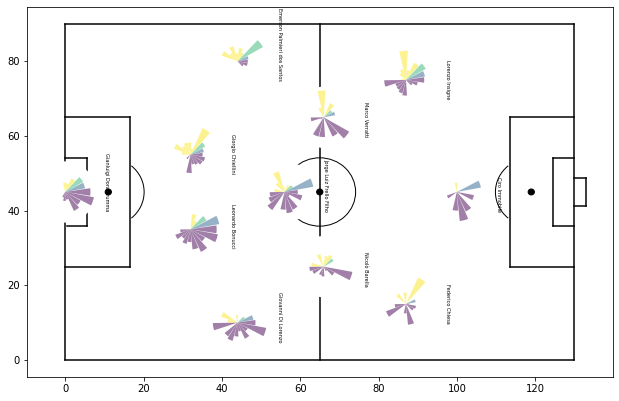

In [23]:
df = json_to_normalized_dataframe( "data/3795220_event.json")
team_dict = players_with_coordinates(df)
get_team_sonar(df, team_dict)

In [6]:
path = "data/3795220_event.json"
df2 = json_to_normalized_dataframe(path)
df2.head(5)

<ipython-input-3-22dd79457c5b>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,clearance.left_foot,dribble.nutmeg,pass.cut_back,pass.goal_assist,shot.aerial_won,injury_stoppage.in_chain,shot.one_on_one
0,dd8f5655-b496-43ac-9464-7fdcc5654230,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,658c9f5b-fed5-459d-a4e8-c1b4eb137abc,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7270804f-2035-4965-a6ec-7975a604605e,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2a9f30d2-9fff-4f0f-88a4-7c7323e753e1,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ca9ecb5-21d1-42fd-afef-aa79929facae,5,1,00:00:00.911,0,0,2,1.343146,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
with open (r"data/3795220_event.json", "r") as f:
     obj = json.load(f)

In [9]:
df = json_normalize(obj)

<ipython-input-9-907b6354ade7>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(obj)


In [186]:
team_dict = players_with_coordinates(home_team = True, df = df)

In [193]:
italy_dict = {}
x_list = [0,44,32,32,44,56,66,66,87,87,100]
y_list = [45,10,35,55,80,45,25,65,15,75,45]
for i in df["tactics.lineup"][0]:
    italy_dict[i['player']['name']] = []

In [172]:
spain_dict = {}
for i in df["tactics.lineup"][1]:
    spain_dict[i['player']['name']] = []

In [194]:
for x,y,z in zip(x_list, y_list, italy_dict):
    entry = {z:[x,y]}
    italy_dict.update(entry)

In [173]:
for x,y,z in zip(x_list, y_list, spain_dict):
    entry = {z:[x,y]}
    spain_dict.update(entry)

NameError: name 'a' is not defined

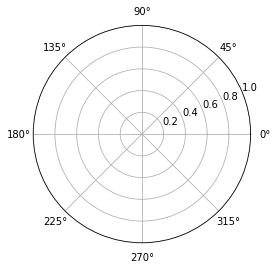

In [10]:
get_individual_sonar('Gianluigi Donnarumma', df)

In [ ]:
a = Passer('Gianluigi Donnarumma')

<BarContainer object of 12 artists>

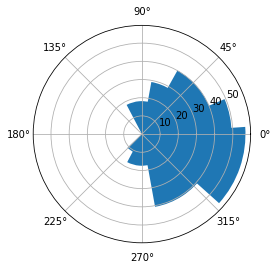

In [133]:
ax = plt.subplot(111, projection='polar')

ax.bar(a["Bin_Mids"], a["pass.length"])

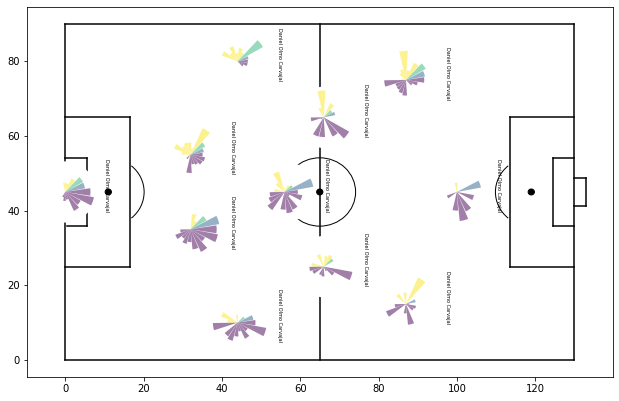

In [196]:
get_team_sonar(df, italy_dict, x_list = [0,44,32,32,44,56,66,66,87,87,100], y_list = [45,10,35,55,80,45,25,65,15,75,45], width = 0.85)

In [20]:
def plot_inset(width, axis_main, data, x,y):
    ax_sub= inset_axes(axis_main, width=width, height=width, loc=10,
                       bbox_to_anchor=(x,y),
                       bbox_transform=axis_main.transData,
                       borderpad=0.0, axes_class=get_projection_class("polar"))

    theta = data["Bin_Mids"]
    radii = data["pass.length"]
    bars = ax_sub.bar(theta, radii, width=0.3, bottom=0.0)
    ax_sub.set_xticklabels([])
    ax_sub.set_yticks([])
    ax_sub.yaxis.grid(False)
    ax_sub.xaxis.grid(False)
    ax_sub.spines['polar'].set_visible(False)

    for r, bar in zip(theta, bars):
        bar.set_facecolor(plt.cm.viridis(r))
        bar.set_alpha(0.5)
    
    

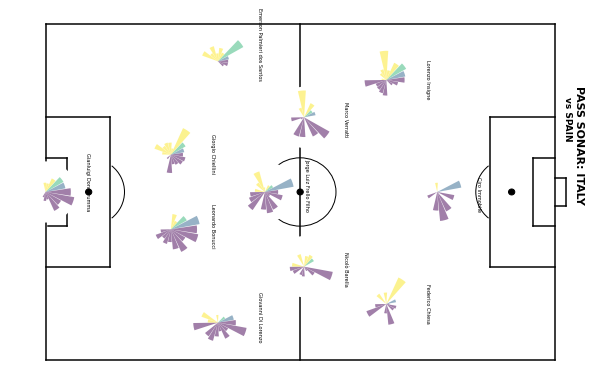

In [161]:
fig, ax = plt.subplots(figsize = (10.5, 6.8))
for player, loc in italy_dict.items():
    plot_inset(0.85 ,ax, data = Passer(player), x = loc[0], y = loc[1])
    ax.text(loc[0]+10, loc[1] - 5, player, size = 5, rotation = -90)


ax.plot([0,0],[0,90], color="black")
ax.plot([0,130],[90,90], color="black")
ax.plot([130,130],[90,0], color="black")
ax.plot([130,0],[0,0], color="black")
ax.plot([65,65],[0,90], color="black")


#Left Penalty Area
ax.plot([16.5,16.5],[65,25],color="black")
ax.plot([0,16.5],[65,65],color="black")
ax.plot([16.5,0],[25,25],color="black")


    #Right Penalty Area
ax.plot([130,113.5],[65,65],color="black")
ax.plot([113.5,113.5],[65,25],color="black")
ax.plot([113.5,130],[25,25],color="black")

    #Left 6-yard Box
ax.plot([0,5.5],[54,54],color="black")
ax.plot([5.5,5.5],[54,36],color="black")
ax.plot([5.5,0.5],[36,36],color="black")


    #Right 6-yard Box
ax.plot([130,124.5],[54,54],color="black")
ax.plot([124.5,124.5],[54,36],color="black")
ax.plot([124.5,130],[36,36],color="black")


    #Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")


    #Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Goals
ax.plot([-3,0],[41.35,41.35],color="black")
ax.plot([-3,-3],[41.35,48.65],color="black")
ax.plot([-3,0],[48.65,48.65],color="black")

ax.plot([133,130],[41.35,41.35],color="black")
ax.plot([133,133],[41.35,48.65],color="black")
ax.plot([133,130],[48.65,48.65],color="black")

    #Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

    #Tidy Axes
ax.axis('off')
ax.text(135, 42, "PASS SONAR: ITALY", rotation = -90, fontweight = "bold", fontsize = 11)
ax.text(132, 59, "vs SPAIN", rotation = -90, fontweight = "bold", fontsize = 9)

plt.savefig("plots/italy/team_sonar/sonar.png", bbox_inches = 'tight')


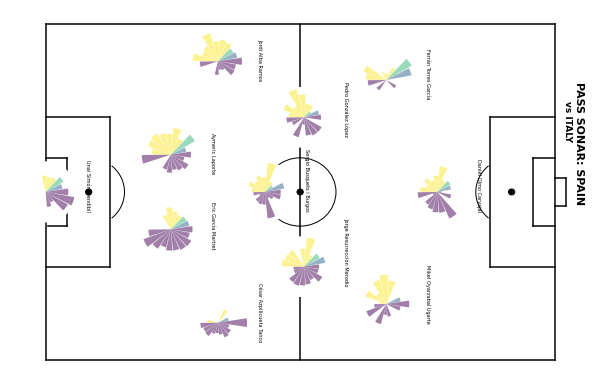

In [177]:
fig, ax = plt.subplots(figsize = (10.5, 6.8))
for player, loc in spain_dict.items():
    plot_inset(0.85 ,ax, data = Passer(player), x = loc[0], y = loc[1])
    ax.text(loc[0]+10, loc[1] - 5, player, size = 5, rotation = -90)


ax.plot([0,0],[0,90], color="black")
ax.plot([0,130],[90,90], color="black")
ax.plot([130,130],[90,0], color="black")
ax.plot([130,0],[0,0], color="black")
ax.plot([65,65],[0,90], color="black")


#Left Penalty Area
ax.plot([16.5,16.5],[65,25],color="black")
ax.plot([0,16.5],[65,65],color="black")
ax.plot([16.5,0],[25,25],color="black")


    #Right Penalty Area
ax.plot([130,113.5],[65,65],color="black")
ax.plot([113.5,113.5],[65,25],color="black")
ax.plot([113.5,130],[25,25],color="black")

    #Left 6-yard Box
ax.plot([0,5.5],[54,54],color="black")
ax.plot([5.5,5.5],[54,36],color="black")
ax.plot([5.5,0.5],[36,36],color="black")


    #Right 6-yard Box
ax.plot([130,124.5],[54,54],color="black")
ax.plot([124.5,124.5],[54,36],color="black")
ax.plot([124.5,130],[36,36],color="black")


    #Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="black")
leftPenSpot = plt.Circle((11,45),0.8,color="black")
rightPenSpot = plt.Circle((119,45),0.8,color="black")


    #Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Goals
ax.plot([-3,0],[41.35,41.35],color="black")
ax.plot([-3,-3],[41.35,48.65],color="black")
ax.plot([-3,0],[48.65,48.65],color="black")

ax.plot([133,130],[41.35,41.35],color="black")
ax.plot([133,133],[41.35,48.65],color="black")
ax.plot([133,130],[48.65,48.65],color="black")

    #Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

    #Tidy Axes
ax.axis('off')
ax.text(135, 42, "PASS SONAR: SPAIN", rotation = -90, fontweight = "bold", fontsize = 11)
ax.text(132, 59, "vs ITALY", rotation = -90, fontweight = "bold", fontsize = 9)

plt.savefig("plots/spain/team_sonar/sonar.png", bbox_inches = 'tight')
